## Import Libraries
Let's import some libraries to get started!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data
Let's start by reading in the the weather of 155 countries in 2020.csv file into a pandas dataframe.



In [29]:
weather = pd.read_csv('weather.csv', low_memory=False)

In [ ]:
weather.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020.0,1.0,22.0,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020.0,1.0,23.0,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020.0,1.0,24.0,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020.0,1.0,25.0,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020.0,1.0,26.0,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
weather.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Year                   1
Month                  1
Day                    1
PRCP               29833
SNWD               65531
TAVG                1029
TMAX               18718
TMIN               18185
SNOW               67490
LATITUDE           64624
LONGITUDE          64624
ELEVATION          64624
PRCP_ATTRIBUTES    72529
TAVG_ATTRIBUTES    72518
TMAX_ATTRIBUTES    72525
TMIN_ATTRIBUTES    72523
DAPR               72531
MDPR               72531
WESD               72531
SNWD_ATTRIBUTES    72531
dtype: int64

In [ ]:
weather.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   STATION          72531 non-null  bool 
 1   Country/Region   72531 non-null  bool 
 2   DATE             72531 non-null  bool 
 3   Year             72531 non-null  bool 
 4   Month            72531 non-null  bool 
 5   Day              72531 non-null  bool 
 6   PRCP             72531 non-null  bool 
 7   SNWD             72531 non-null  bool 
 8   TAVG             72531 non-null  bool 
 9   TMAX             72531 non-null  bool 
 10  TMIN             72531 non-null  bool 
 11  SNOW             72531 non-null  bool 
 12  LATITUDE         72531 non-null  bool 
 13  LONGITUDE        72531 non-null  bool 
 14  ELEVATION        72531 non-null  bool 
 15  PRCP_ATTRIBUTES  72531 non-null  bool 
 16  TAVG_ATTRIBUTES  72531 non-null  bool 
 17  TMAX_ATTRIBUTES  72531 non-null  bool 
 18  TMIN_A

### This heatmap visualizes the presence of missing (null) values in the 'weather' DataFrame.This visualization helps quickly identify patterns of missing data in the dataset, which can be valuable for data cleaning and preprocessing tasks, as well as for understanding the extent and distribution of missing values across different columns and rows.

<Axes: >

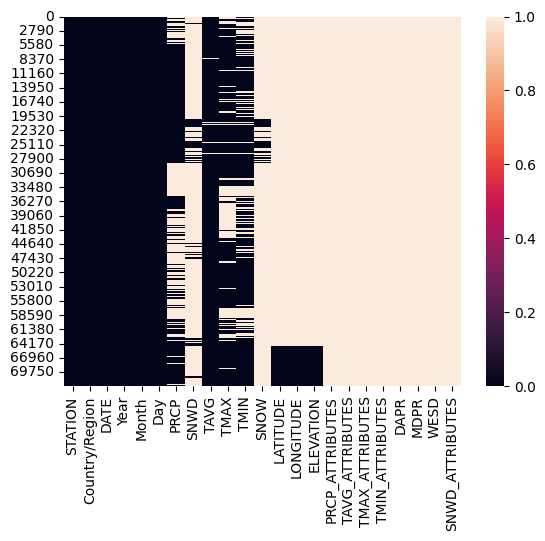

In [ ]:
sns.heatmap(weather.isnull())

# Removing null columns









### This code analyzes the 'weather' DataFrame, identifying and listing columns with more than 20,000 missing (null) values. It achieves this by first calculating the count of null values for each column and then filtering and printing the column names that exceed the specified threshold. This process aids in identifying columns with substantial missing data, which may require further investigation or data imputation strategies.

In [28]:
null_counts = weather.isnull().sum()

columns_with_many_nulls = null_counts[null_counts > 20000]

print(columns_with_many_nulls.index.tolist())

[]


In [9]:
weather = weather.drop(['SNWD', 'SNOW', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES']
, axis = 1)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION         72531 non-null  object 
 1   Country/Region  72531 non-null  object 
 2   DATE            72531 non-null  object 
 3   Year            72530 non-null  float64
 4   Month           72530 non-null  float64
 5   Day             72530 non-null  float64
 6   PRCP            42698 non-null  float64
 7   TAVG            71502 non-null  float64
 8   TMAX            53813 non-null  float64
 9   TMIN            54346 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.5+ MB





### > Data Visualization for Insight: This code uses Seaborn to create a pairplot, a grid of scatterplots, for visualizing the relationships between numeric variables (PRCP, TAVG, TMAX, TMIN) and their distribution patterns. The 'Month' variable is used for coloring the data points, allowing us to explore potential seasonal patterns or variations in the data.


### > Palette for Categorical Data: The 'palette' parameter is set to "Set2," which defines the color scheme for different 'Month' categories in the pairplot. This aids in distinguishing data points belonging to different months and provides insights into how the numeric variables change throughout the year.


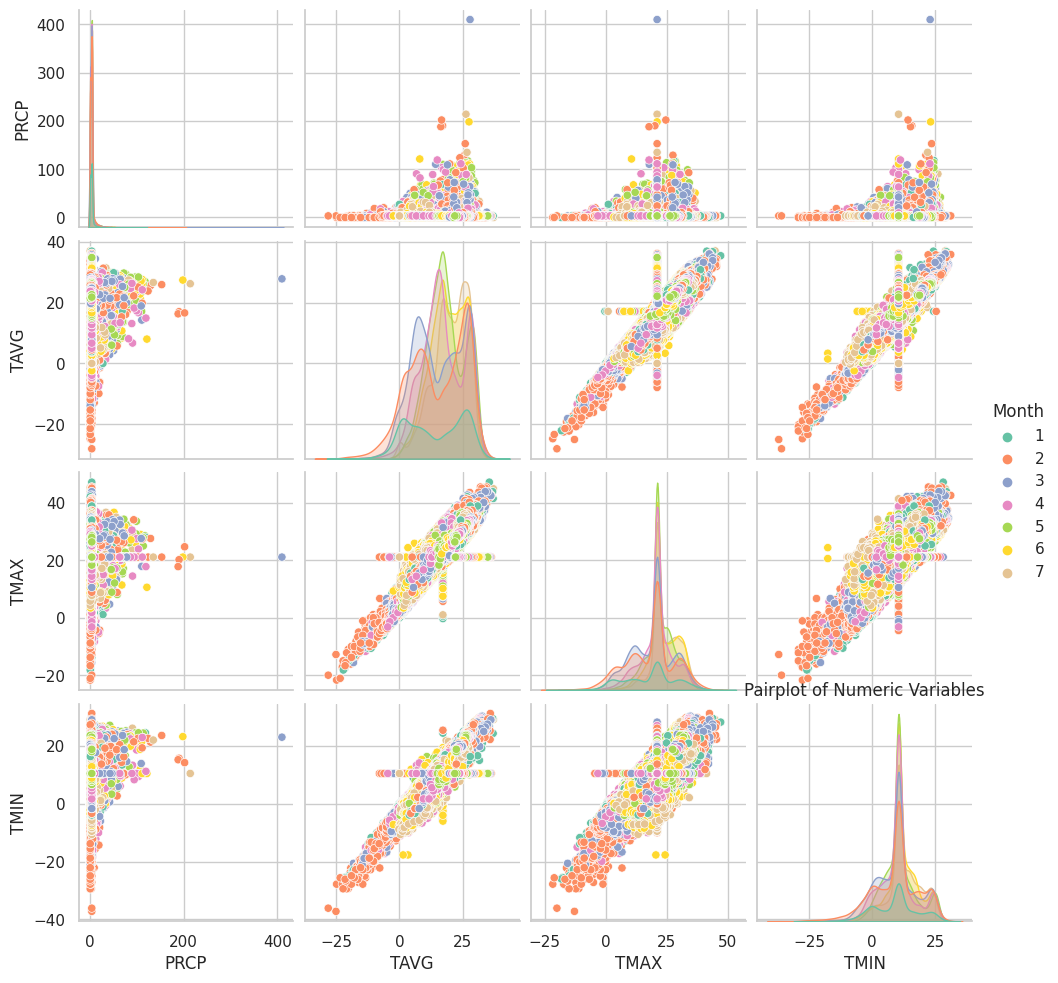

In [24]:

sns.set(style="whitegrid")

palette = "Set2"
sns.pairplot(weather[['PRCP', 'TAVG', 'TMAX', 'TMIN','Month']], hue ='Month', palette=palette)
plt.title('Pairplot of Numeric Variables')
plt.show()



# Performing Linear Regression

### This code splits the data into training and testing sets for a linear regression task. A Linear Regression model is trained on the training data, and predictions are made on the testing data. Mean Squared Error (MSE) is computed to assess the model's performance. Additionally, a scatter plot is generated to visualize differences between predicted and actual values, and the results, including real values, predicted values, and differences, are stored in a DataFrame and saved to a CSV file. This workflow is a typical process for building, evaluating, and visualizing a linear regression model for predicting 'TAVG' using given features.

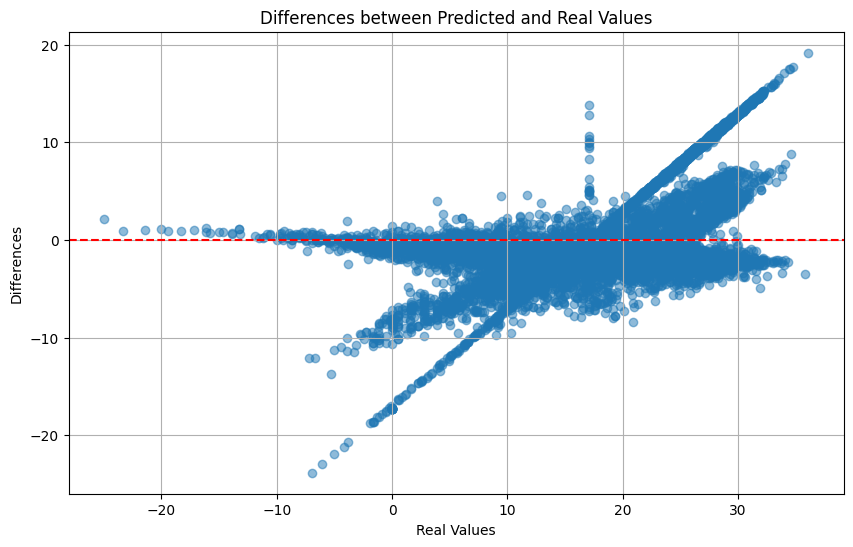

Mean Squared Error: 20.565895066245634


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = weather[['Year', 'Month', 'Day', 'PRCP', 'TMAX', 'TMIN']]
y = weather['TAVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

differences = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, differences, alpha=0.5)
plt.title('Differences between Predicted and Real Values')
plt.xlabel('Real Values')
plt.ylabel('Differences')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse}")

result = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred, 'Difference': differences})
result.to_csv('predictions_and_differences.csv', index=False)


# Performing XGBRegressorion

In [14]:
from xgboost import XGBRegressor



# In this we used XGBoost Regressor model and made prediction on the test data

### This code splits a dataset into training and testing sets, then builds and evaluates an XGBoost Regressor model for regression. It trains the model on the training data, makes predictions on the testing data, and computes the Mean Squared Error (MSE) to assess model performance. A scatter plot is created to visualize the differences between predicted and real values, with the red dashed line representing zero differences. The results, including real values, predicted values, and differences, are stored in a DataFrame and saved to a CSV file for further analysis, demonstrating the process of training, evaluating, and visualizing an XGBoost regression model.

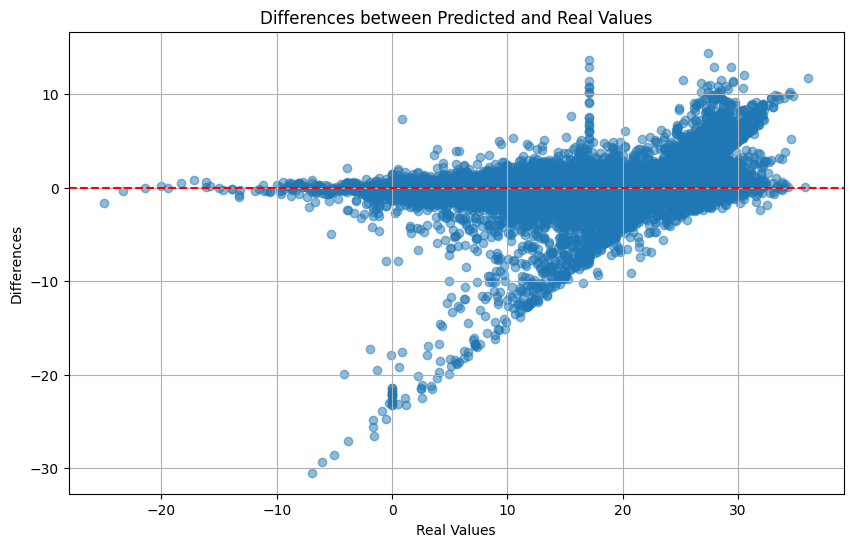

Mean Squared Error: 9.560077350040029


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)


differences = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_test, differences, alpha=0.5)
plt.title('Differences between Predicted and Real Values')
plt.xlabel('Real Values')
plt.ylabel('Differences')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()


print(f"Mean Squared Error: {mse}")


result = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred, 'Difference': differences})
result.to_csv('predictions_and_differences.csv', index=False)





